# **Personal Loan**

●      ID: Customer ID

●      Age: Customer’s age in completed years

●      Experience: # years of professional experience

●      Income: Annual income of the customer (in thousand dollars)

●      ZIP Code: Home Address ZIP code.

●      Family: the Family size of the customer

●      CCAvg: Average spending on credit cards per month (in thousand dollars)

●      Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

●      Mortgage: Value of house mortgage if any. (in thousand dollars)

●      Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

●      Securities_Account: Does the customer have a securities account with the bank?

●      CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

●      Online: Do customers use internet banking facilities?

●      CreditCard: Does the customer use a credit card issued by any other Bank (excluding ABC Bank)?

##Starting Run

In [ ]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 766 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import fast_ml


#Data Preprocessing and Model Building
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Model Validation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score


#etc
from collections import Counter
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data 

#bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/personal_loan.csv') #adel
bank = pd.read_csv('/content/drive/My Drive/Classroom/Project/personal_loan.csv') #Aul
#bank = pd.read_csv('/content/drive/MyDrive/Digital Skola/personal_loan.csv') #Ram
#bank = pd.read_csv('/content/drive/MyDrive/Final Project DS15 Numpy team/personal_loan.csv') #Aji

In [ ]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
bank.rename(columns={'ID':'id', 'Age':'age', 'Experience':'exp', 'Income':'income', 'ZIP Code':'zip_code', 'Family':'family', 'CCAvg':'ccavg',
       'Education':'edu', 'Mortgage':'mortgage', 'Personal Loan':'personal_loan', 'Securities Account':'securities',
       'CD Account':'cd', 'Online':'online', 'CreditCard':'cc'}, inplace=True)

Pembuatan Age Group supaya visualisasi lebih jelas

Kalau mau liat perbedaan pake agegroup atau engga, tinggal ganti agegroup dengan age

In [ ]:
#a = 23 // 10 * 10
#a

In [ ]:
bank["agegroup"] = bank["age"] // 10 * 10
bank = bank.sort_values(by = "agegroup")
bank["agegroup"] = bank["agegroup"].astype(str) + "s"
bank["agegroup"]

0       20s
1811    20s
1839    20s
1847    20s
1868    20s
       ... 
3792    60s
4395    60s
1574    60s
3800    60s
440     60s
Name: agegroup, Length: 5000, dtype: object

## **Explanatory Research**

In [ ]:
bank.isnull().sum()

id               0
age              0
exp              0
income           0
zip_code         0
family           0
ccavg            0
edu              0
mortgage         0
personal_loan    0
securities       0
cd               0
online           0
cc               0
agegroup         0
dtype: int64

In [ ]:
bank.duplicated().sum()

0

In [ ]:
bank.shape

(5000, 15)

In [ ]:
bank.dtypes

id                 int64
age                int64
exp                int64
income             int64
zip_code           int64
family             int64
ccavg            float64
edu                int64
mortgage           int64
personal_loan      int64
securities         int64
cd                 int64
online             int64
cc                 int64
agegroup          object
dtype: object

## Exploratory Data Analysis & Data Visualization

In [ ]:
bank.describe()

,id,age,exp,income,zip_code,family,ccavg,edu,mortgage,personal_loan,securities,cd,online,cc
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000




1.   Average age of ABC customers is 45 years old, with the range of 23 until 67 years old
2.   Average spending for credit card per person in a month is $1.937
3.   Experience -3 years
4.   Personal loan (target column) 0-75% data distribution value is 0 which indicated data imbalance
5.   Tidak duplicate
6.   Tidak ada null





Text(0.5, 1.0, 'ABC Bank Customer Age Distribution')

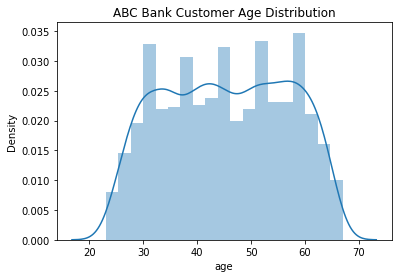

In [ ]:
sns.distplot(bank['age'])
plt.title('ABC Bank Customer Age Distribution')

* Customer's age is almost uniformedly distributed. 
* Customer's age has fairly distributed in each 30s, 40s, 50s and 60s. 


In [ ]:
bank["personal_loan"].value_counts()

0    4520
1     480
Name: personal_loan, dtype: int64

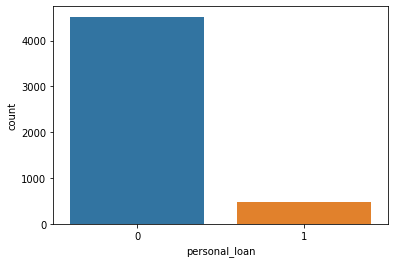

In [ ]:
sns.countplot("personal_loan",data=bank)

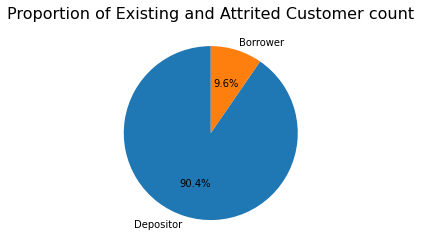

In [ ]:
plt.pie(bank['personal_loan'].value_counts(), labels = ['Depositor', 'Borrower'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

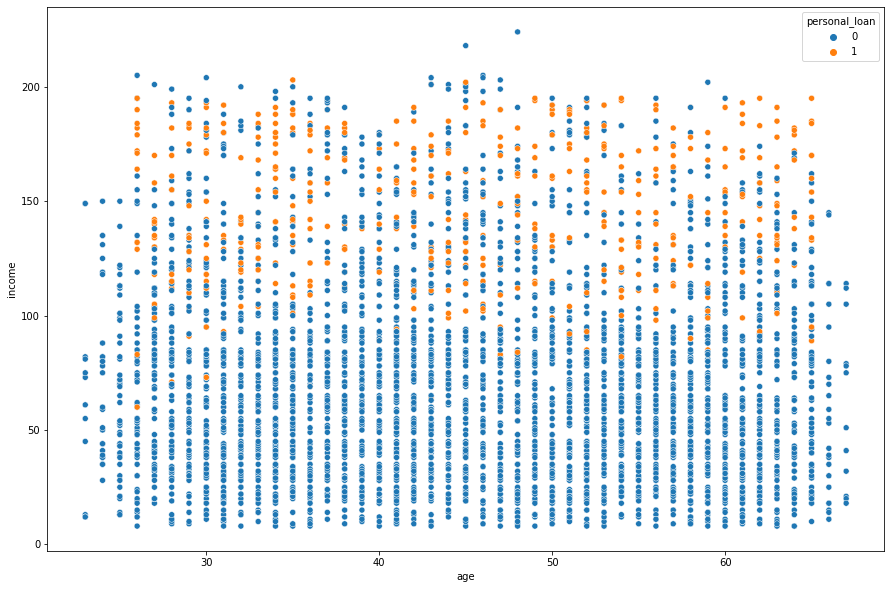

In [ ]:
#Versi Scatterplot

plt.figure(figsize=(15, 10))
sns.scatterplot(data = bank, x="age", y="income",
                hue="personal_loan")

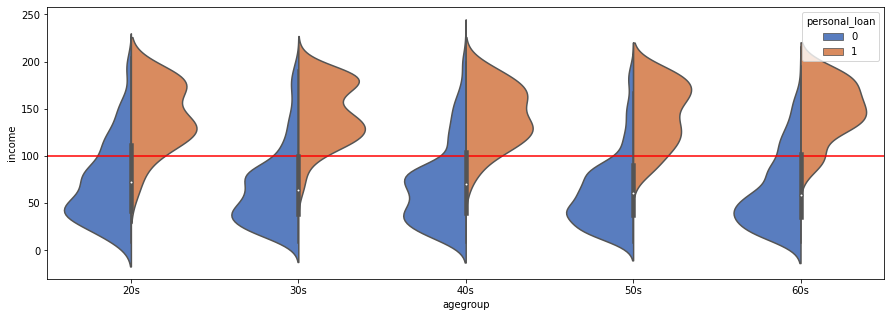

In [ ]:
#Versi Violinplot
plt.figure(figsize=(15, 5))
plt.axhline(y = 100, color = 'r', linestyle = '-')
sns.violinplot(data = bank, x="agegroup", y="income",
                hue="personal_loan", palette="muted", split=True)

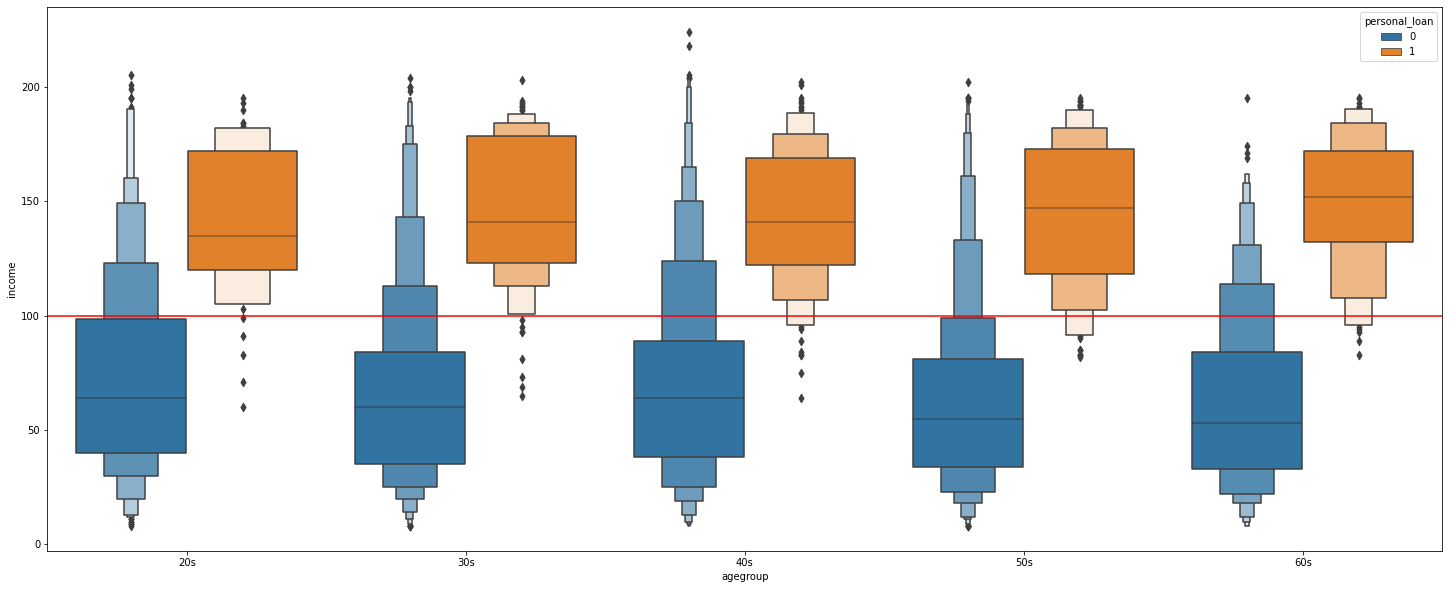

In [ ]:
#Boxen Plot
plt.figure(figsize=(25, 10))
sns.boxenplot(data = bank, x="agegroup", y="income",
                hue="personal_loan")
plt.axhline(y = 100, color = 'r', linestyle = '-')

People with income above $100.000 took the Personal Loan despite of age.

Text(0.5, 1.0, 'Ann_CCAvg Distribution')

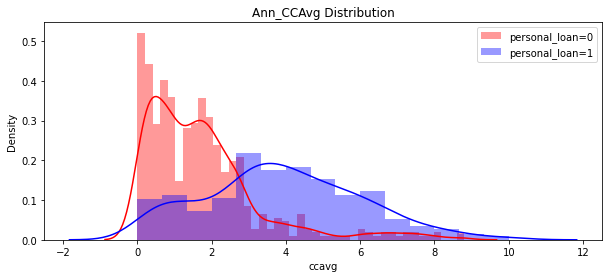

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(bank[bank["personal_loan"] == 0]['ccavg'], color = 'r',label='personal_loan=0')
sns.distplot(bank[bank["personal_loan"] == 1]['ccavg'], color = 'b',label='personal_loan=1')
plt.legend()
plt.title("Ann_CCAvg Distribution")

Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

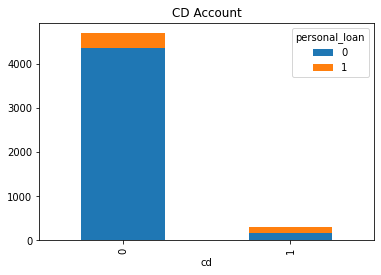

In [ ]:
pd.crosstab(bank['cd'],bank['personal_loan']).plot(kind='bar',stacked=True,title='CD Account')

1. Almost 50% of customers having Certified Deposit, had borrowed Personal Loan
2. However, 4358 customers out of 5000, do not have Certified Deposit Account and did not borrow Personal Loan




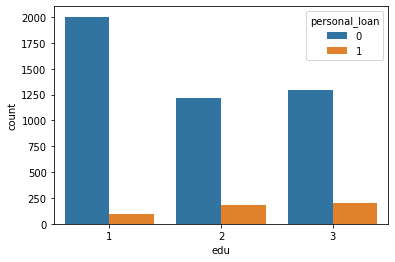

In [ ]:
sns.countplot("edu",hue = "personal_loan",data=bank)

Based on education level, professionals are the most who took Personal Loan

--> 

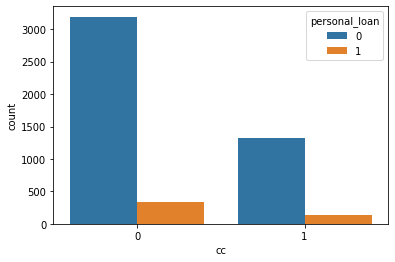

In [ ]:
sns.countplot("cc", hue = "personal_loan",data=bank)

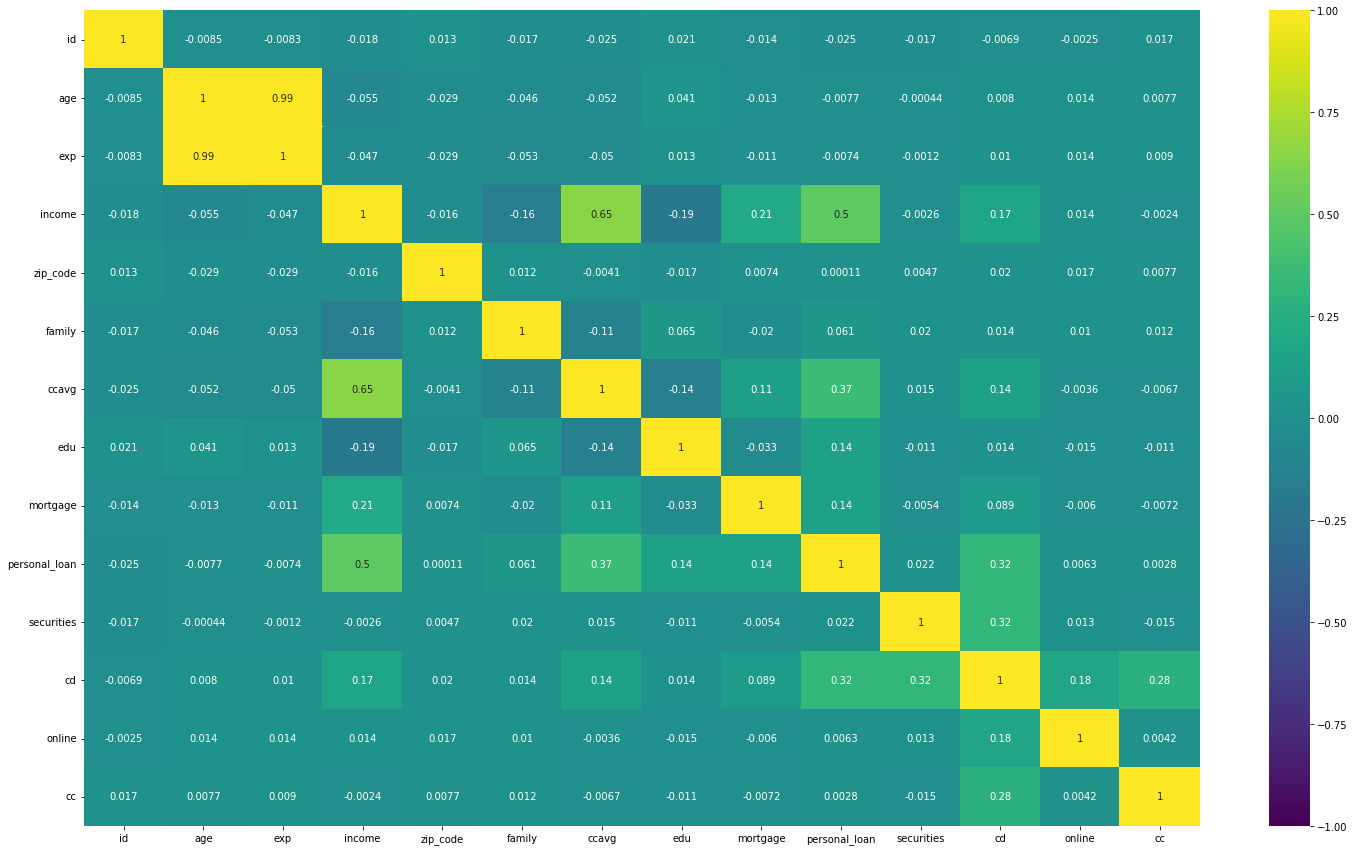

In [ ]:
plt.figure(figsize= (25,15))

sns.heatmap(bank.corr(),vmin = -1, vmax = 1, cmap = 'viridis',annot = True)


There are multicollinearity between age and experience with the value of 0.99.


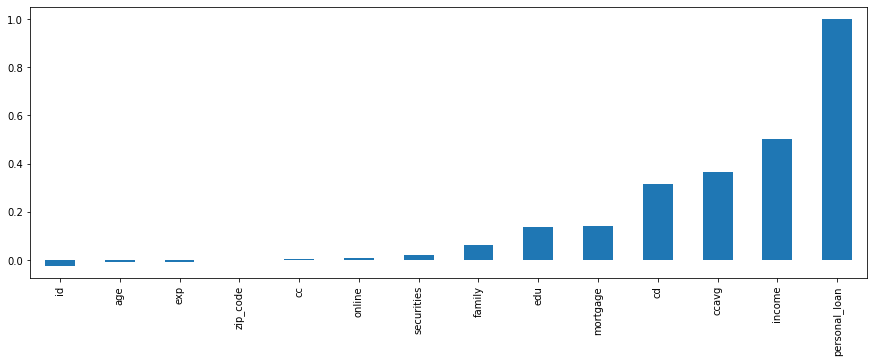

In [ ]:
plt.figure(figsize=(15,5))
bank.corr()["personal_loan"].sort_values().plot(kind="bar")

Income has the highest correlation score towards personal loan (0.5) therefore we might want to focus on income variable.
People with income above $100.000 most probably will take the loan.

##Data Preparation

###**Data Scaling**

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 440
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   age            5000 non-null   int64  
 2   exp            5000 non-null   int64  
 3   income         5000 non-null   int64  
 4   zip_code       5000 non-null   int64  
 5   family         5000 non-null   int64  
 6   ccavg          5000 non-null   float64
 7   edu            5000 non-null   int64  
 8   mortgage       5000 non-null   int64  
 9   personal_loan  5000 non-null   int64  
 10  securities     5000 non-null   int64  
 11  cd             5000 non-null   int64  
 12  online         5000 non-null   int64  
 13  cc             5000 non-null   int64  
 14  agegroup       5000 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 754.0+ KB


In [ ]:
X = bank.drop(['exp', 'agegroup'], axis = 1)

In [ ]:
X.head(3)

,id,age,income,zip_code,family,ccavg,edu,mortgage,personal_loan,securities,cd,online,cc
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1811,1812,28,11,94534,4,0.5,3,0,0,0,0,0,0
1839,1840,28,43,95616,4,1.3,3,0,0,0,0,1,1


In [ ]:
X = X.set_index('id')
X

,age,income,zip_code,family,ccavg,edu,mortgage,personal_loan,securities,cd,online,cc
id,,,,,,,,,,,,
1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1812,28,11,94534,4,0.5,3,0,0,0,0,0,0
1840,28,43,95616,4,1.3,3,0,0,0,0,1,1
1848,25,52,95126,3,2.6,3,159,0,0,0,0,0
1869,25,118,92833,1,5.4,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3793,62,109,92709,4,1.7,3,0,0,0,0,1,0
4396,66,25,94720,4,0.6,2,0,0,0,0,1,1
1575,62,42,92106,3,1.5,1,0,0,0,0,1,0


In [ ]:
#X_pisah = bank.drop(['personal_loan', 'exp', 'mortgage', 'securities', 'cd', 'online', 'cc', "agegroup"], axis=1) #dropbinary
#X_scale = bank.drop(['id', 'personal_loan', 'exp', 'age',  'income', 'zip_code', 'family', 'ccavg', 'mortgage','edu', "agegroup"], axis=1) #dropnonbinary

X_scale = X[['age',  'income', 'zip_code', 'family', 'ccavg', 'mortgage','edu']]

In [ ]:
X_scale.head(3)

,age,income,zip_code,family,ccavg,mortgage,edu
id,,,,,,,
1,25,49,91107,4,1.6,0,1
1812,28,11,94534,4,0.5,0,3
1840,28,43,95616,4,1.3,0,3


In [ ]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X_scale)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, index=X_scale.index, columns=X_scale.columns)
X_scaled_df.head(3)

,age,income,zip_code,family,ccavg,mortgage,edu
id,,,,,,,
1,-1.774417,-0.538229,-0.964114,1.397414,-0.193385,-0.555524,-1.049078
1812,-1.512683,-1.363793,0.651146,1.397414,-0.822862,-0.555524,1.332484
1840,-1.512683,-0.668581,1.161129,1.397414,-0.365061,-0.555524,1.332484


In [ ]:
Xs = X.copy()

In [ ]:
Xs[['age',  'income', 'zip_code', 'family', 'ccavg', 'mortgage','edu']] = X_scaled_df[['age',  'income', 'zip_code', 'family', 'ccavg', 'mortgage','edu']]

In [ ]:
Xs.head(3)

,age,income,zip_code,family,ccavg,edu,mortgage,personal_loan,securities,cd,online,cc
id,,,,,,,,,,,,
1,-1.774417,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,0,1,0,0,0
1812,-1.512683,-1.363793,0.651146,1.397414,-0.822862,1.332484,-0.555524,0,0,0,0,0
1840,-1.512683,-0.668581,1.161129,1.397414,-0.365061,1.332484,-0.555524,0,0,0,1,1


###Train Test Split

In [ ]:
#do train test split for features and labels
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(Xs, target = 'personal_loan', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1, random_state = 1)

In [ ]:
# checking training sample numbers for Label ( attrition flag)

print(Counter(y_train))

Counter({0: 3618, 1: 382})


###SMOTE To Overcome Imbalance Data

In [ ]:
# perform Standard Scaling and SMOTE to handle imbalance between data 

oversample = SMOTE(random_state = 1)
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
# checking training sample numbers for Label ( attrition flag) after SMOTE ( they are equal )


from collections import Counter
print(Counter(y_train))

Counter({0: 3618, 1: 3618})


# Random Forest Class

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train,y_train)


#model.feature_importances_

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,rf_pred)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.87      0.85      0.86        48

    accuracy                           0.97       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.97      0.97      0.97       500



In [ ]:
print(roc_auc_score(y_test, rf_pred))

0.9204461651917403


**MAE**

In [ ]:
rf_error = mae(y_test, rf_pred)
rf_error

0.026

###Validasi

In [ ]:
rf_valid = rf_model.predict(X_valid)

In [ ]:
confusion_matrix(y_valid,rf_valid)
print(classification_report(y_valid,rf_valid))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       450
           1       0.94      0.94      0.94        50

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



In [ ]:
print(roc_auc_score(y_valid, rf_valid))

0.9666666666666666


## Support Vector Machine

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[443   9]
 [ 10  38]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       452
           1       0.81      0.79      0.80        48

    accuracy                           0.96       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.96      0.96      0.96       500



In [ ]:
print(roc_auc_score(y_test, svc_pred))

0.885877581120944


**MAE**

In [ ]:
SVM_error=mae(y_test, svc_pred)
SVM_error

0.038

In [ ]:
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[443   9]
 [ 10  38]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       452
           1       0.81      0.79      0.80        48

    accuracy                           0.96       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.96      0.96      0.96       500



In [ ]:
svc_valid = svc_model.predict(X_valid)

confusion_matrix(y_valid,svc_valid)
print(classification_report(y_valid,svc_valid))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       450
           1       0.80      0.90      0.85        50

    accuracy                           0.97       500
   macro avg       0.90      0.94      0.92       500
weighted avg       0.97      0.97      0.97       500



##Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[403  49]
 [  9  39]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       452
           1       0.44      0.81      0.57        48

    accuracy                           0.88       500
   macro avg       0.71      0.85      0.75       500
weighted avg       0.93      0.88      0.90       500



In [ ]:
LR_valid = LR_model.predict(X_valid)

confusion_matrix(y_valid,LR_valid)
print(classification_report(y_valid,LR_valid))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94       450
           1       0.51      0.88      0.65        50

    accuracy                           0.90       500
   macro avg       0.75      0.89      0.80       500
weighted avg       0.94      0.90      0.91       500



In [ ]:
print(roc_auc_score(y_test, y_pred))

0.8520464601769911


**MAE**

In [ ]:
LR_error = mae(y_test, y_pred)
LR_error

0.116

##Decision Tree

In [ ]:
model_tree = DecisionTreeClassifier(random_state = 111)
fit_tree = model_tree.fit(X_train,y_train)

In [ ]:
predict_tree = fit_tree.predict(X_test)

In [ ]:
#fit_tree.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_tree))
print(classification_report(y_test,predict_tree))

[[447   5]
 [  7  41]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.89      0.85      0.87        48

    accuracy                           0.98       500
   macro avg       0.94      0.92      0.93       500
weighted avg       0.98      0.98      0.98       500



In [ ]:
print(roc_auc_score(y_test, predict_tree))

0.9215523598820059


**MAE**

In [ ]:
tree_error = mae(y_test, predict_tree)
tree_error

0.024

###Validasi

In [ ]:
tree_valid = fit_tree.predict(X_valid)

confusion_matrix(y_valid, tree_valid)
print(classification_report(y_valid,tree_valid))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       450
           1       0.85      0.88      0.86        50

    accuracy                           0.97       500
   macro avg       0.92      0.93      0.92       500
weighted avg       0.97      0.97      0.97       500



[Text(0.4015625, 0.9666666666666667, 'X[1] <= 0.399\nentropy = 1.0\nsamples = 6336\nvalue = [3168, 3168]'),
 Text(0.1484375, 0.9, 'X[4] <= 0.282\nentropy = 0.227\nsamples = 2670\nvalue = [2572, 98]'),
 Text(0.025, 0.8333333333333334, 'X[4] <= 0.253\nentropy = 0.014\nsamples = 2448\nvalue = [2445, 3]'),
 Text(0.0125, 0.7666666666666667, 'entropy = 0.0\nsamples = 2285\nvalue = [2285, 0]'),
 Text(0.0375, 0.7666666666666667, 'X[4] <= 0.258\nentropy = 0.132\nsamples = 163\nvalue = [160, 3]'),
 Text(0.025, 0.7, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05, 0.7, 'X[4] <= 0.271\nentropy = 0.096\nsamples = 162\nvalue = [160, 2]'),
 Text(0.0375, 0.6333333333333333, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.0625, 0.6333333333333333, 'X[4] <= 0.28\nentropy = 0.196\nsamples = 66\nvalue = [64, 2]'),
 Text(0.05, 0.5666666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.075, 0.5666666666666667, 'entropy = 0.0\nsamples = 64\nvalue = [64, 0]'),
 Text(0.271875

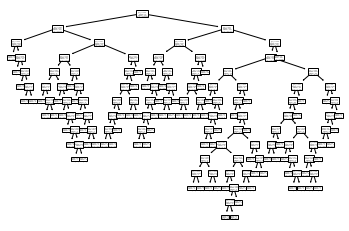

In [ ]:
sklearn.tree.plot_tree(fit_tree)

In [ ]:
import graphviz 
dot_data = sklearn.tree.export_graphviz(fit_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("DTGraph") #kalo mau liat, ada di folder sebelah kiri nanti ke render namanya DTGraph.pdf. Kalo belum muncul, tunggu aja. Tapi harus jalanin code dulu soalnya tiap runtime datanya kehapus kl gasalah

'DTGraph.pdf'

##KNN

In [ ]:
#Trying model with KNN

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy with KNN", accuracy)

print(classification_report(y_test, knn_pred))

print(roc_auc_score(y_test, knn_pred))

Accuracy with KNN 0.948
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       452
           1       0.74      0.71      0.72        48

    accuracy                           0.95       500
   macro avg       0.85      0.84      0.85       500
weighted avg       0.95      0.95      0.95       500

0.8408923303834809


In [ ]:
knn_valid = knn.predict(X_valid)

confusion_matrix(y_valid,knn_valid)
print(classification_report(y_valid,knn_valid))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       450
           1       0.83      0.76      0.79        50

    accuracy                           0.96       500
   macro avg       0.90      0.87      0.88       500
weighted avg       0.96      0.96      0.96       500



In [ ]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[440,  12],
       [ 14,  34]])

**MAE**

In [ ]:
knn_error = mae(y_test, knn_pred)
knn_error

0.052

##Model Comparison

PIC: Aram

Random Forest

Comparison (hasil test aja):
RF
SVM
DT
LogR
KNN

Metric:
- 
- 

##Model Tuning

In [ ]:
#Decision Tree

In [ ]:
#Grid Search CV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_tuning = DecisionTreeClassifier()

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [2,5,8,10,12,15,18,20]
min_samples_split = np.arange(1,40,5)
min_samples_leaf = np.arange(1,40,5)


In [ ]:
parameters = {
              "criterion":['gini','entropy'],
              "max_depth":range(1,20),
              "min_samples_split":range(1,20),
              "min_samples_leaf":range(1,5)
}

In [ ]:
grid = GridSearchCV(tree_tuning,
                    param_grid = parameters,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 2888 candidates, totalling 28880 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 20)},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

##Tuned Model

In [ ]:
model_tree_tuned = DecisionTreeClassifier(criterion = 'gini', 
                                          max_depth = 12, 
                                          min_samples_leaf = 1,
                                          min_samples_split = 2, 
                                          random_state = 111)
tuned_tree = model_tree_tuned.fit(X_train,y_train)
predict_tree_tuned = tuned_tree.predict(X_test)
print(confusion_matrix(y_test,predict_tree_tuned))
print(classification_report(y_test,predict_tree_tuned))

[[449   3]
 [  8  40]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.93      0.83      0.88        48

    accuracy                           0.98       500
   macro avg       0.96      0.91      0.93       500
weighted avg       0.98      0.98      0.98       500



In [ ]:
model_tree_tuned = DecisionTreeClassifier(criterion = 'gini', 
                                          max_depth = 14, 
                                          min_samples_leaf = 1,
                                          min_samples_split = 4, 
                                          random_state = 111)
tuned_tree = model_tree_tuned.fit(X_train,y_train)
predict_tree_tuned = tuned_tree.predict(X_test)
print(confusion_matrix(y_test,predict_tree_tuned))
print(classification_report(y_test,predict_tree_tuned))

[[448   4]
 [  8  40]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       452
           1       0.91      0.83      0.87        48

    accuracy                           0.98       500
   macro avg       0.95      0.91      0.93       500
weighted avg       0.98      0.98      0.98       500



### Testing

In [ ]:
model_tree_tuned2 = DecisionTreeClassifier(criterion = 'gini', 
                                          max_depth = 20, 
                                          min_samples_leaf = 31,
                                          min_samples_split = 16, 
                                          random_state = 111)
tuned_tree2 = model_tree_tuned2.fit(X_train,y_train)
predict_tree_tuned2 = tuned_tree2.predict(X_test)
print(confusion_matrix(y_test,predict_tree_tuned2))
print(classification_report(y_test,predict_tree_tuned2))

[[435  17]
 [  7  41]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       452
           1       0.71      0.85      0.77        48

    accuracy                           0.95       500
   macro avg       0.85      0.91      0.87       500
weighted avg       0.96      0.95      0.95       500



##Save Model

In [ ]:
import pickle

In [ ]:
filename = 'personal_loan_prediction.pkl'
pickle.dump(tuned_tree, open(filename, 'wb'))

##Prompt Untuk Prediction

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_valid, y_valid)
print(result)

0.978


In [ ]:
X_predict = pd.DataFrame(index=[0], columns=X_train.columns)
X_predict

,age,income,zip_code,family,ccavg,edu,mortgage,securities,cd,online,cc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_predict.loc[-1] = [25, 49, 91107, 4, 1.6, 1, 0, 1, 0, 0, 0]
X_predict = X_predict.iloc[1: , :]
X_predict

,age,income,zip_code,family,ccavg,edu,mortgage,securities,cd,online,cc
-1,25.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
tes = loaded_model.predict(X_predict)

print('hasil = ', tes)

hasil =  [1]
